In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [5]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [7]:
data = data.drop_duplicates()
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trtbps    302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalachh  302 non-null    int64  
 8   exng      302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slp       302 non-null    int64  
 11  caa       302 non-null    int64  
 12  thall     302 non-null    int64  
 13  output    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [9]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


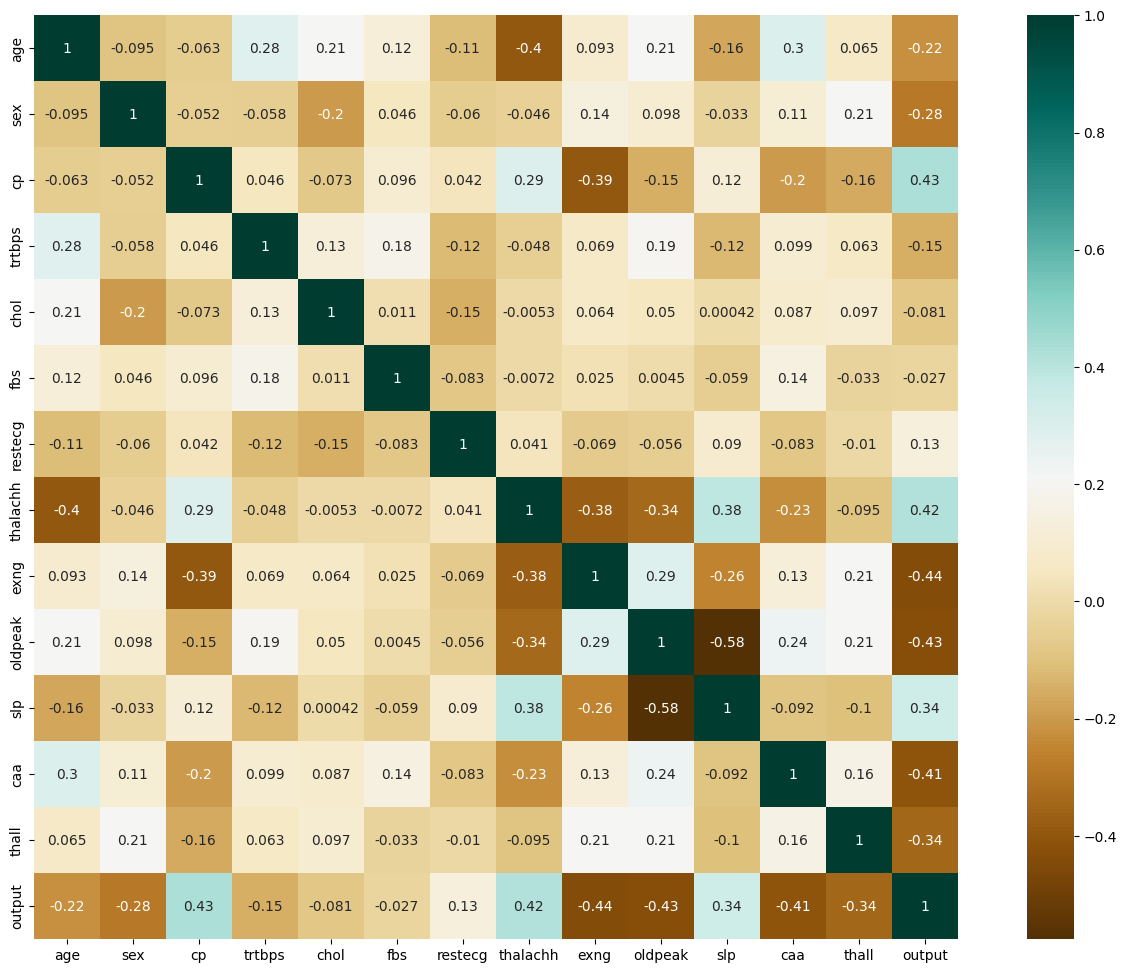

In [10]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, cmap='BrBG', square=True)
plt.show()

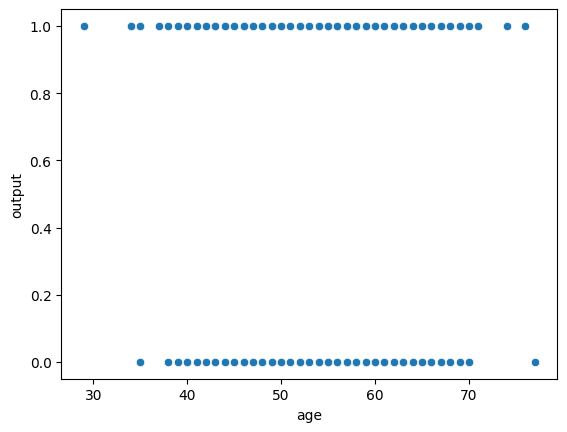

In [11]:
sns.scatterplot(x = 'age', y='output', data=data)
plt.show()

In [12]:
#low age peoples also have heart attack records doesnt provide very helpful conclusions

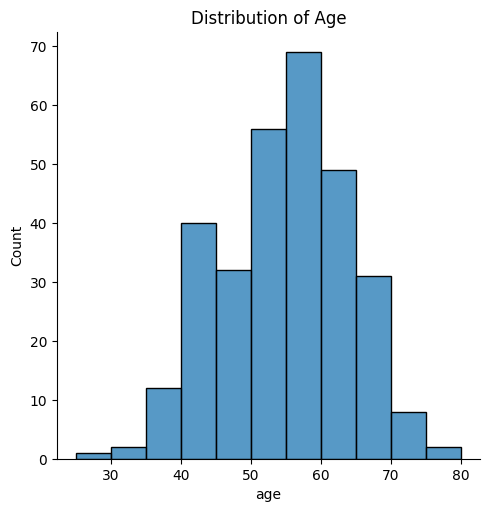

In [13]:
### See age distribution
bins_arr = np.linspace(25,80,12)
sns.displot(data['age'], bins=bins_arr)
plt.title('Distribution of Age')
plt.show()

C:\Users\Omkar Borker\AppData\Local\Temp\ipykernel_1932\1448917455.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 1)` for the same effect.

  sns.barplot(x='restecg', y='output', data=data, hue='sex', ci=1)


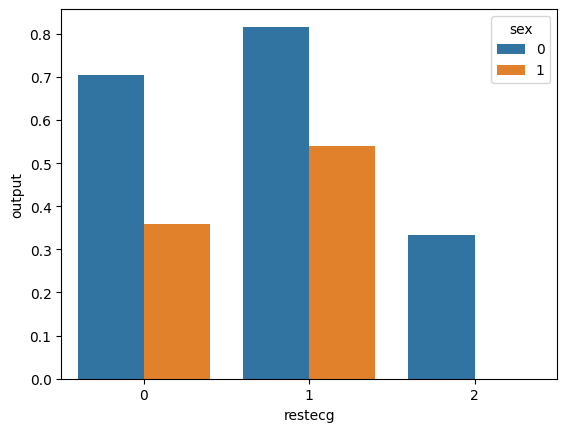

In [14]:
## relation between restcg and output with distribution of sex
sns.barplot(x='restecg', y='output', data=data, hue='sex', ci=1)
plt.show()

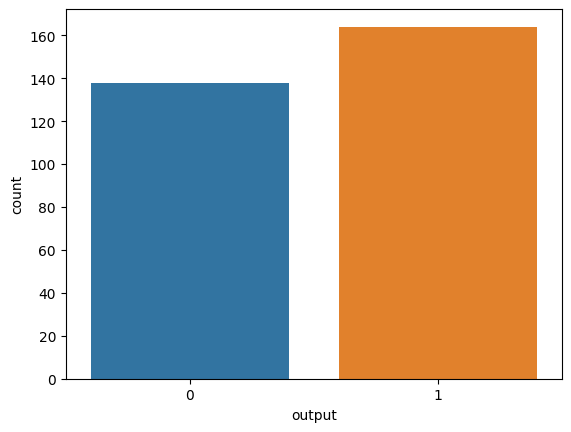

% of 0 class peoples are: 54.3046357615894%
% of 1 class peoples are: 45.6953642384106%


In [15]:
## Now, check output data is balance or not
sns.countplot(x = 'output', data=data)
plt.show()
print('% of 0 class peoples are: {}%'.format(100 * data['output'].value_counts().values[0] / len(data)))
print('% of 1 class peoples are: {}%'.format(100 * data['output'].value_counts().values[1] / len(data)))

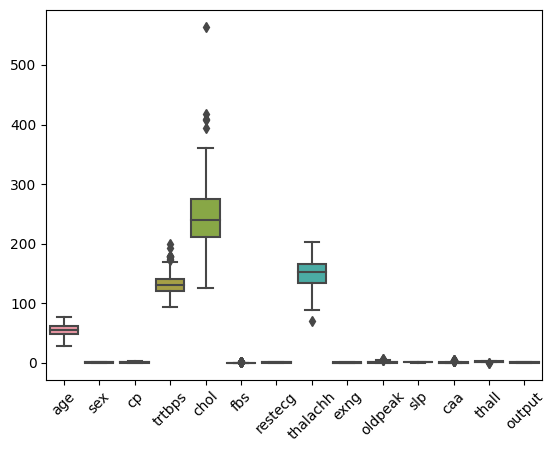

In [16]:
sns.boxplot(data)
plt.xticks(rotation = 45)
plt.show()

In [18]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [19]:
from sklearn.model_selection import train_test_split
X_sample, y_sample = train_test_split(data, train_size=0.8, random_state=42, stratify = y)

In [20]:
X_sample.shape, y_sample.shape

((241, 14), (61, 14))

In [21]:
X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
X_test = y_sample.iloc[:,:-1].values
y_test = y_sample.iloc[:,-1].values

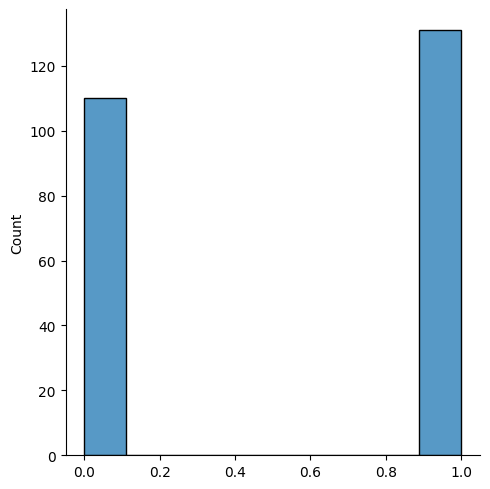

In [22]:
## Now, check the distribution of output in y_train and y_test
sns.displot(y_train)
plt.show()

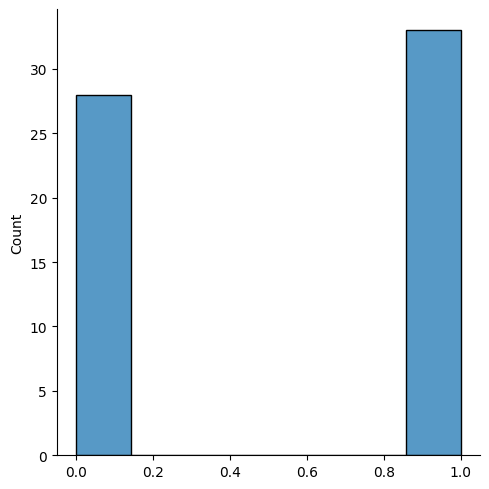

In [23]:
sns.displot(y_test)
plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
## import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [27]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [28]:
## Train the model using Linear SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [29]:
## Train the model using Kernel SVM
ksvm = SVC(kernel = 'rbf')
ksvm.fit(X_train, y_train)
y_pred_ksvm = ksvm.predict(X_test)

In [30]:
## Train the model using Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [31]:
## Train the model using Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [32]:
## Train the model using Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

In [33]:
## Train the model using KNeighbors
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [35]:

## Train the model using XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
df = pd.DataFrame({
    'Model Name': ['LogisticRegression', 'Linear SVM', 'Kernel SVM', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy_score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_ksvm), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_xgb)]
})
df

,Model Name,Accuracy_score
0,LogisticRegression,0.786885
1,Linear SVM,0.836066
2,Kernel SVM,0.836066
3,KNN,0.803279
4,Naive Bayes,0.819672
5,Decision Tree,0.721311
6,Random Forest,0.819672
7,XGBoost,0.803279


In [38]:
df = df.sort_values(by = ['Accuracy_score'], ascending = False)
df

,Model Name,Accuracy_score
1,Linear SVM,0.836066
2,Kernel SVM,0.836066
4,Naive Bayes,0.819672
6,Random Forest,0.819672
3,KNN,0.803279
7,XGBoost,0.803279
0,LogisticRegression,0.786885
5,Decision Tree,0.721311
